# Principal Component Analysis in scikit-learn

## Introduction
In this lesson, we'll look at implementing PCA in scikit-learn. Upto this point, we have developed an intuition behid the process involved in PCA and also coded it from scratch in Numpy. Scikit-learn takes away most of the calculations from analysis as its PCA module offers them under the hood. 

## Objectives
You will be able to:
* Implement PCA algorithm using scikit-learn library 
* Extract and visualize principal components and their explained variance
* Reduce the number of dimensions for a given dataset using PCA 


## Let's get started 

In this lab, we shall replicate the process for running PCA as we saw earlier,in the scikit-learn environment. 

Let's begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Generate Data for analysis

Consider the following 200 points:

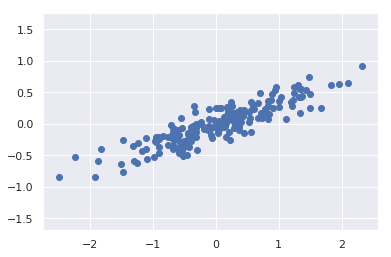

In [2]:
# Generate some data for analysis

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Fit the PCA model

It is clear that there is an almost linear relationship between the x and y variables. We know that in principal component analysis, this relationship is quantified by finding a list of the *principal components* in the data, and using those axes to describe the dataset.

Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [3]:
# Create a PCA instance and fit the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Number of principal components required
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## PCA Results

The `fit` method learns two key quantities from the data:
* Principal components 
* Explained Variance

Below is how we extract them from a learned PCA model. 

In [4]:
# Check components
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
# Check explained variance

print(pca.explained_variance_)

[0.7625315 0.0184779]


Based on above, the total variance explained by both principal components is around 0.77. 

## Visualize Principal Components - Optional

This step is not mandatory while running PCA. Visualizing the components here is aimed to provide you with a intuition for the process. 

We can visualize the quantities above to see what they mean. We can plot them them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector as shown below. 

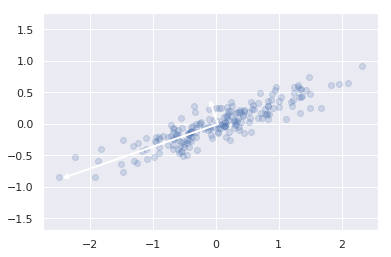

In [6]:
# Draw the principal comnents on top of scatter plot 
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data. The length of these components is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "*principal components*" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![](pcs.png)

This transformation from data axes to principal axes is called an __affine transformation__, which basically means it is composed of a translation, rotation, and uniform scaling.

## PCA for dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [ ]:
## Compute only the first principal component
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

### Inverse Transformation

The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

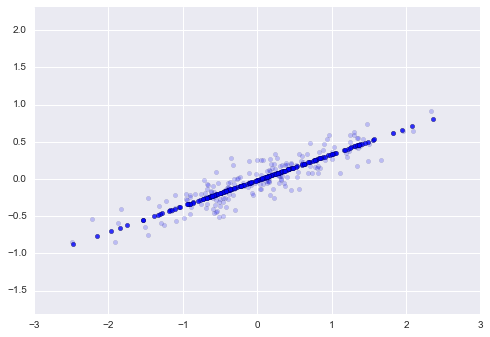

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.

This makes clear what a PCA dimensionality reduction means.

> Dimensionality Reduction involves removing information along the least important principal axis or axes, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

## PCA Variations

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including `RandomizedPCA` and `SparsePCA`, both also in the `sklearn.decomposition` submodule.` RandomizedPCA` uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while `SparsePCA` introduces a regularization term that serves to enforce sparsity of the components.

##  Summary
In this lesson, we looked at implementing PCA with scikit-learn. We looked creating instances of PCA while defining number of required components. We also visualized and explained the principal components and their meaning. Dimensionality reduction involves dropping one or more such components which describe the data variance at minimum. Finally we looked at some PCA variations offered by scikit-learn for special cases. 